<center>  
    <h1> <b> Pokémon Data Analysis </b> </h1>
</center>

<center>
    <img src = "images/Pokemon.jpg">
</center>

#### **1. Introduction :**
This dataset contains information on all 802 Pokemon from all 7 generations of Pokemon. The information contained in this dataset include Base Stats, Performance against other types, Height, Weight, Classification, Egg Steps, Experience Points, Abilities, etc. The dataset was acquired from Kaggle's [The Complete Pokemon Dataset](https://www.kaggle.com/rounakbanik/pokemon).

<br>

#### **2. Objective :**
The objective of this project is to perform descriptive analysis to answer some questions like,
- Most prevalent primary types?
- Which type is the strongest overall? Which is the weakest?
- Which type of Pokemon are easiest to catch?
- Which type of Pokemon are effective against which other type of Pokemon?
- Which is the best Pokemon?

also to perform some predictive analysis such as,
- To build a classifier to identify legendary Pokemon.
- Try to build a Pokemon dream team. That is, a team of 6 Pokemon that inflicts the most damage while remaining relatively impervious to any other team of 6 Pokemon.

<br>

**Importing modules and the dataset :**

In [1]:
# Set up
import numpy as np
import pandas as pd

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix

# ML
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df = pd.read_csv("dataset/pokemon.csv")
display(df.head())

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [3]:
print(f"The shape of the dataset is: {df.shape}\n")

The shape of the dataset is: (801, 41)



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

#### **Attributes of the dataset :**
- **name :** The English name of the Pokemon
- **japanese_name :** The Original Japanese name of the Pokemon
- **pokedex_number :** The entry number of the Pokemon in the National Pokedex
- **percentage_male :** The percentage that the given Pokemon is male. Blank if Pokemon is genderless.
- **type1 :** The Primary type of the Pokemon
- **type2 :** The Secondary type of the Pokemon
- **classification :** The Classification of the Pokemon as described by the Sun and Moon Pokedex
- **height_m :** Height of the Pokemon in metres
- **weight_kg :** The Weight of the Pokemon in kilograms
- **capture_rate :** Capture rate of the Pokemon
- **baseeggsteps :** The number of steps required to hatch an egg of the Pokemon
- **abilities :** A stringfield list of abilities that Pokemon have
- **experience_growth :** The experience growth of the Pokemon
- **base_happiness :** Base Happiness of the Pokemon
- **against_? :** Eighteen features that denote the amount of damage taken against an attack of a particular type
- **hp :** The base HP of the Pokemon
- **attack :** The base attack of the Pokemon
- **defense :** The base defense of the Pokemon
- **sp_attack :** The base special attack of the Pokemon
- **sp_defense :** The base special defense of the Pokemon
- **speed :** The base speed of the Pokemon
- **generation :** The numbered generation which the Pokemon was first introduced
- **is_legendary :** Denotes if the Pokemon is legendary.

In [5]:
display(df.head())

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


<br>
Description of the attributes of the dataset.

In [6]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
against_bug,801.0,9.962547e-01,0.597248,0.25,0.5,1.0,1.0,4.0
against_dark,801.0,1.057116e+00,0.438142,0.25,1.0,1.0,1.0,4.0
against_dragon,801.0,9.687890e-01,0.353058,0.00,1.0,1.0,1.0,2.0
against_electric,801.0,1.073970e+00,0.654962,0.00,0.5,1.0,1.0,4.0
against_fairy,801.0,1.068976e+00,0.522167,0.25,1.0,1.0,1.0,4.0
against_fight,801.0,1.065543e+00,0.717251,0.00,0.5,1.0,1.0,4.0
against_fire,801.0,1.135456e+00,0.691853,0.25,0.5,1.0,2.0,4.0
against_flying,801.0,1.192884e+00,0.604488,0.25,1.0,1.0,1.0,4.0
against_ghost,801.0,9.850187e-01,0.558256,0.00,1.0,1.0,1.0,4.0
against_grass,801.0,1.034020e+00,0.788896,0.25,0.5,1.0,1.0,4.0


<br>

Checking for null-values in the dataset.

In [7]:
df.isna().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


capture_rate, height_m, type2 and weight_kg has null values. <br>
**Note:** null value in percentange male defines that the pokemon is female.

<br>

Let's fix the 1 value in capture_rate.

In [8]:
df["capture_rate"].replace({'30 (Meteorite)255 (Core)': np.nan}, inplace=True)
df["capture_rate"] = pd.to_numeric(df["capture_rate"])

<br>

### **Descriptive Analysis**
### Some Exploratory Data Analysis (EDA) 
#### 1. Univariate Analysis

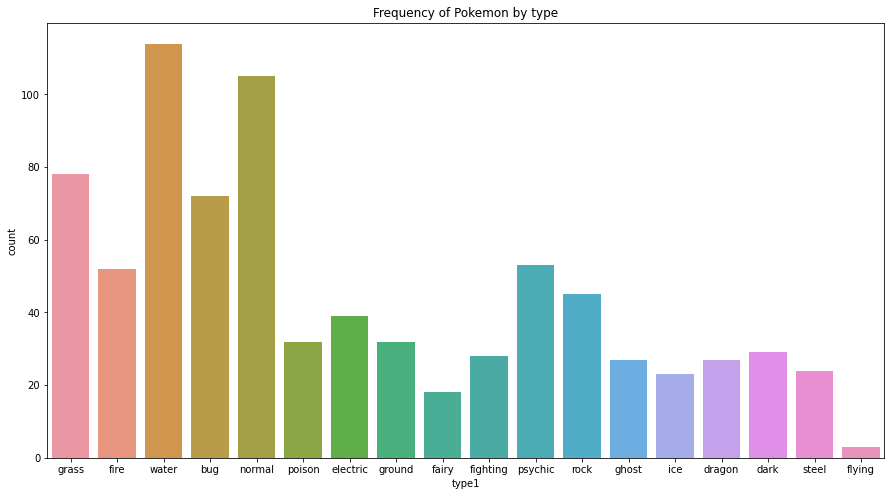

In [9]:
# The frequency of Pokemon by type
plt.figure(figsize=(15, 8))
plt.title("Frequency of Pokemon by type")
sns.countplot(x='type1', data=df)
plt.show()

The frequency of the Water and Normal type is the highest among Pokemons.

<br>

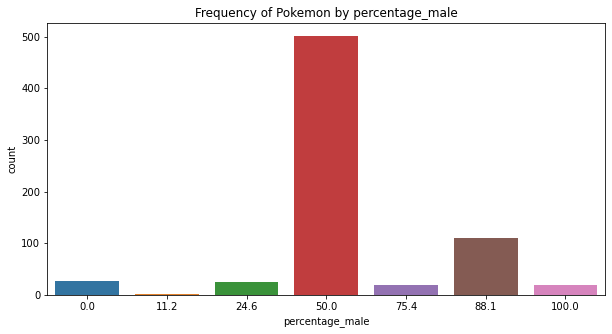

In [10]:
# The frequency of Pokemon's percentage male 
plt.figure(figsize=(10, 5))
plt.title("Frequency of Pokemon by percentage_male")
sns.countplot(x='percentage_male', data=df)
plt.show()

Most of the Pokemon indentify as genderless (non-binary).

<br>

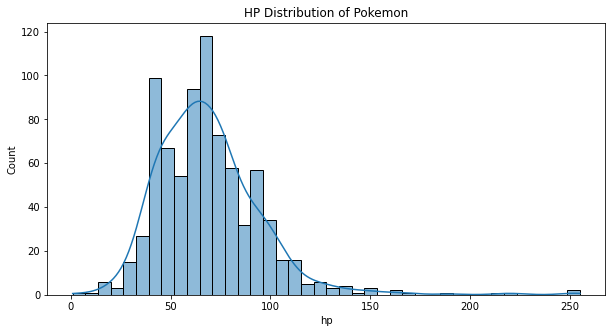

In [11]:
# HP Distribution of Pokemon
plt.figure(figsize=(10, 5))
plt.title("HP Distribution of Pokemon")
sns.histplot(x='hp', data=df, kde=True)
plt.show()

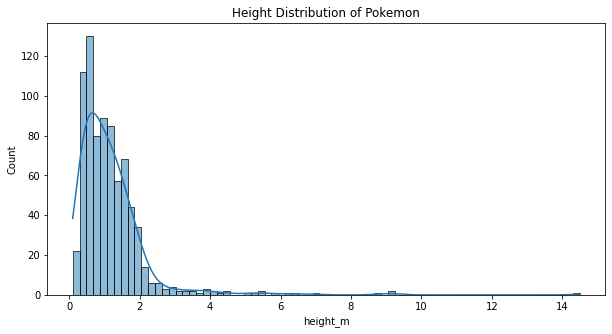

In [12]:
# Height Distribution of Pokemon
plt.figure(figsize=(10, 5))
plt.title("Height Distribution of Pokemon")
sns.histplot(x='height_m', data=df, kde=True)
plt.show()

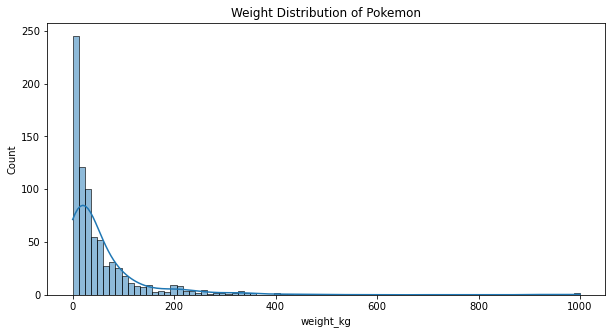

In [13]:
# Weight Distribution of Pokemon
plt.figure(figsize=(10, 5))
plt.title("Weight Distribution of Pokemon")
sns.histplot(x='weight_kg', data=df, kde=True)
plt.show()

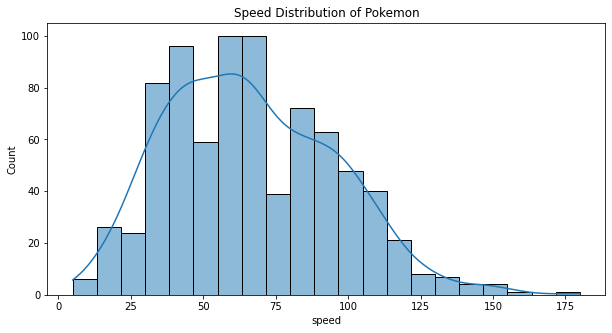

In [14]:
# Speed Distribution of Pokemon
plt.figure(figsize=(10, 5))
plt.title("Speed Distribution of Pokemon")
sns.histplot(x='speed', data=df, kde=True)
plt.show()

<br>

#### 2. Bivariate Analysis

Attack and Defense are the most exciting attributes of a Pokemon, so lets analyze those two.

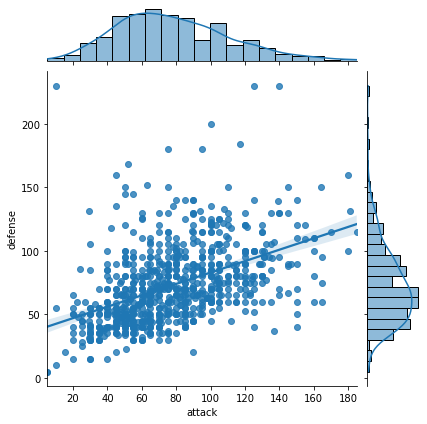

In [15]:
sns.jointplot(x=df['attack'], y=df['defense'], kind='reg')
plt.show()

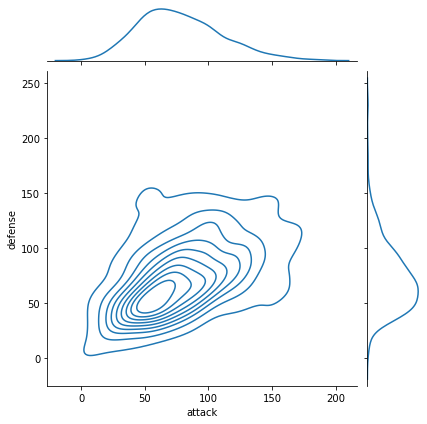

In [16]:
ax = sns.jointplot(x=df['attack'], y=df['defense'], kind='kde')
plt.show()

<br>

Some pair plots are as follows, 

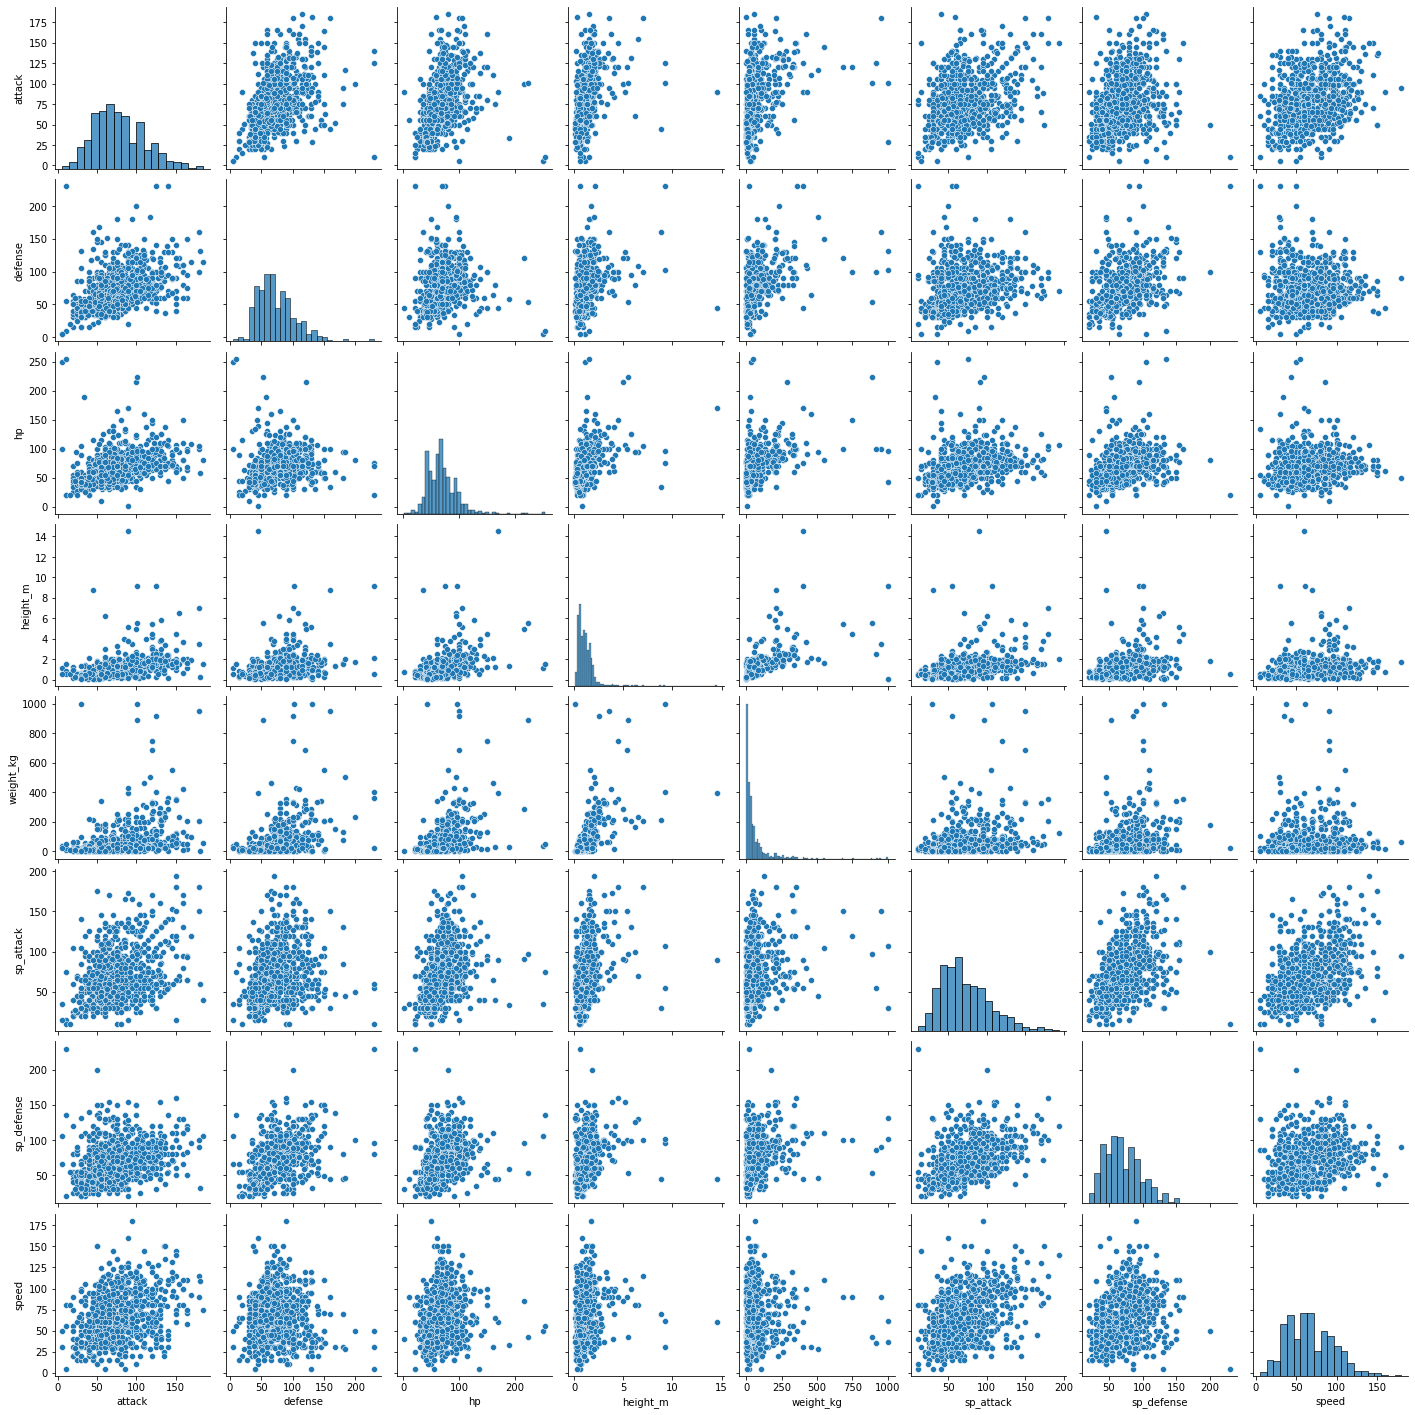

In [17]:
pairs = df[['attack', 'defense', 'hp', 'height_m', 'weight_kg', 'sp_attack', 'sp_defense', 'speed']]
sns.pairplot(pairs)
plt.show()

Clearly, we cannot see much of correlation between the pairs. <br>
Let's confirm the same using a heatmap.

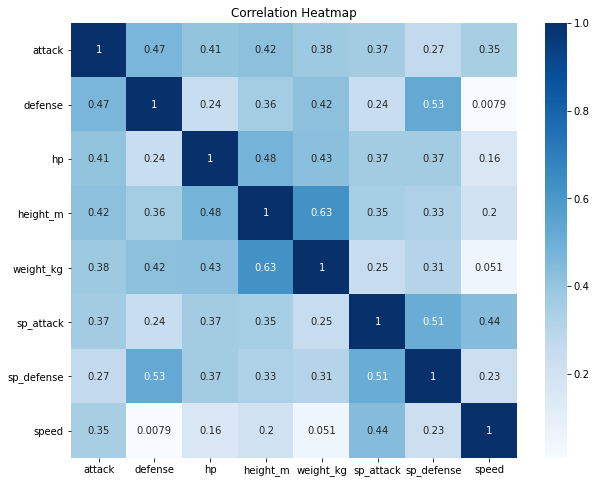

In [18]:
pairs = df[['attack', 'defense', 'hp', 'height_m', 'weight_kg', 'sp_attack', 'sp_defense', 'speed']]
corr = pairs.corr()
plt.figure(figsize=(10, 8))
ax = sns.heatmap(corr, annot=True, cmap='Blues')
ax.set_title("Correlation Heatmap")
plt.show()

Hence, it is confirmed that there is little to no correlation between the numerical data in the dataset. <br>
<br>
Let's matrix plot the experience_growth, generation and base_total attributes, to see generational base_total.

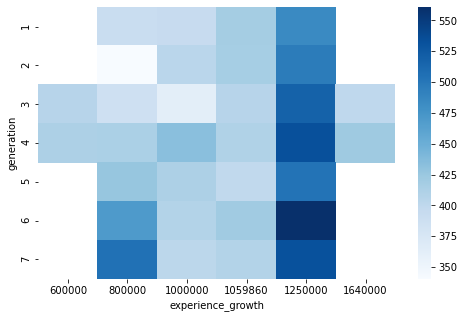

In [19]:
pair = df[['experience_growth', 'generation', 'base_total']]
pair = pair.pivot_table(index='generation', columns='experience_growth', values='base_total')
plt.figure(figsize=(8, 5))
sns.heatmap(pair, cmap='Blues')
plt.show()

That's enough EDA as of now, lets answer some interesting questions.
<br>

### Queries with Descriptive Visualizations 

**How many new Pokemon are there per generation?** <br>
A simple count plot will answer this.

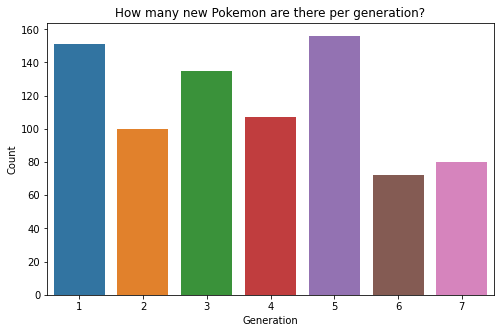

In [20]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x = df['generation'])
ax.set_title("How many new Pokemon are there per generation?")
ax.set(xlabel='Generation', ylabel='Count')
plt.show()

<br>

**What are the most common type combinations?** <br>
A horizontal bar graph will be perfect for this, as we can have more room for labelling.

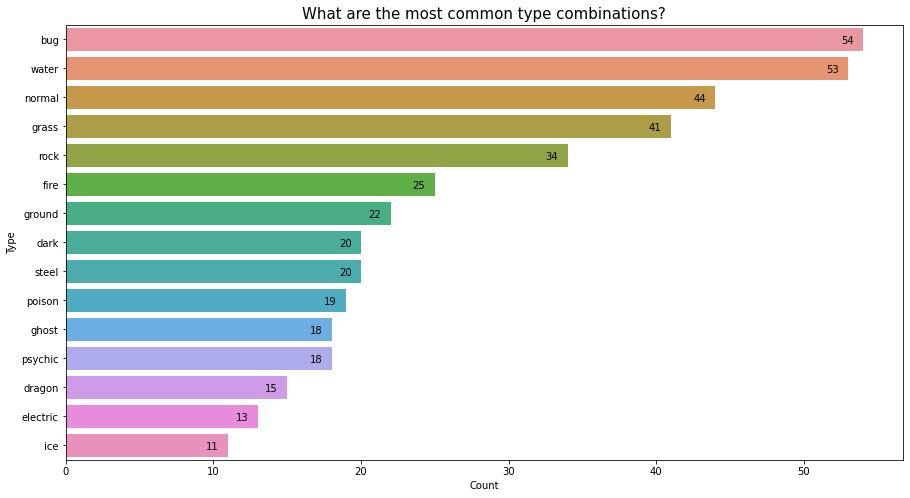

In [21]:
top15_type_counts = df[~df['type2'].isnull()]["type1"].value_counts()[:15]
plt.figure(figsize=(15,8))
ax = sns.barplot(y=top15_type_counts.index, x=top15_type_counts.values, orient='h')
ax.set_title("What are the most common type combinations?", size=15)
ax.set(ylabel="Type", xlabel="Count");

# Annotate value labels to each type
for index, value in enumerate(top15_type_counts): 
    plt.annotate(value, xy=(value-1.5, index+0.15), color='black') 

<br>

**What are the most common type of legendary pokemon?** <br>
A horizontal bar graph should work again.

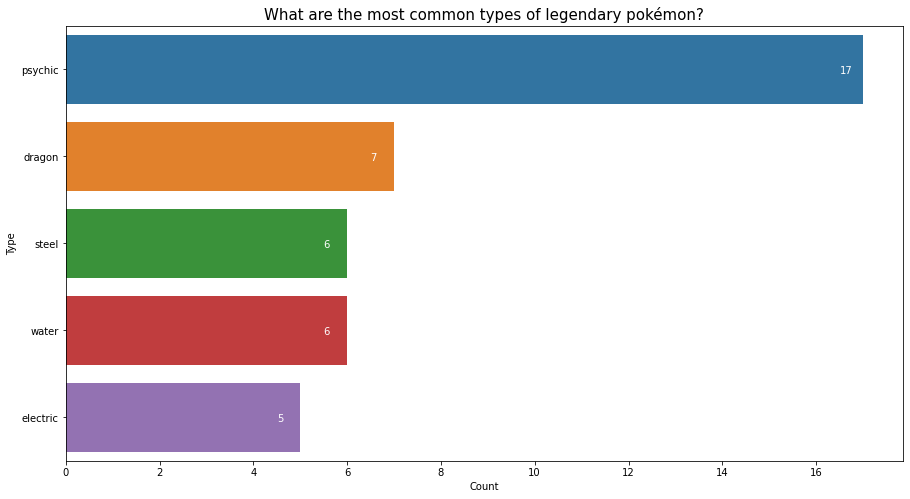

In [22]:
legendary_pokemon = df[df['is_legendary'] == 1]
legendary_pokemon_types_top5 = legendary_pokemon["type1"].value_counts()[:5]
plt.figure(figsize=(15,8))
ax = sns.barplot(y=legendary_pokemon_types_top5.index, x=legendary_pokemon_types_top5.values, orient='h')
ax.set_title("What are the most common types of legendary pokémon?", size=15)
ax.set(xlabel="Count", ylabel="Type")

# Annotate value labels to each type
for index, value in enumerate(legendary_pokemon_types_top5): 
    plt.annotate(value, xy=(value-0.5, index+0.05), color='white')

<br>

**Which generation has the easiest Pokemon to catch?** <br>
For this we will use a box plot.

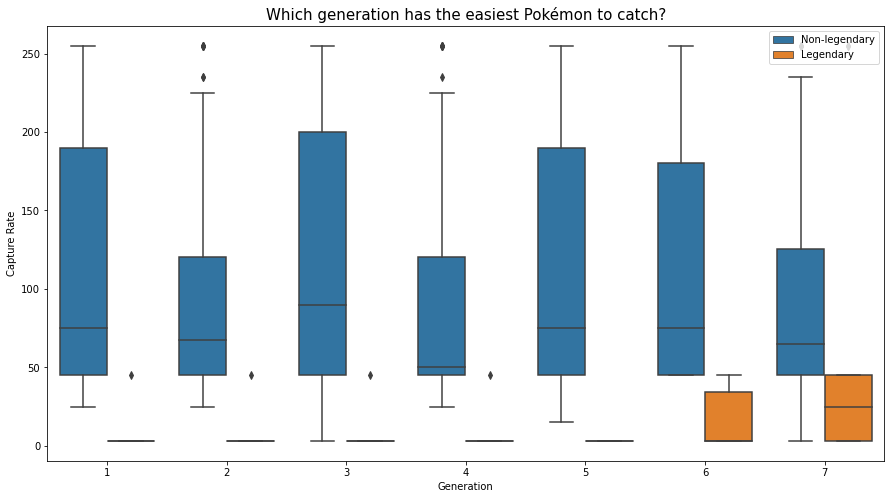

In [23]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x='generation',y='capture_rate', hue="is_legendary", data = df)
ax.set_title("Which generation has the easiest Pokémon to catch?", size=15)
ax.set(xlabel="Generation", ylabel="Capture Rate")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["Non-legendary", "Legendary"], loc='upper right')
plt.show()

Clearly, Generation 3 has the easiest Pokemon to catch, while Generation 4 has the hardest. <br>
Legendary Pokemon are easier to capture from Generation 6 onwards.
<br>

<br>

**Which type has the easiest Pokemon to catch?** <br>
As the previous question, we will use a box plot.

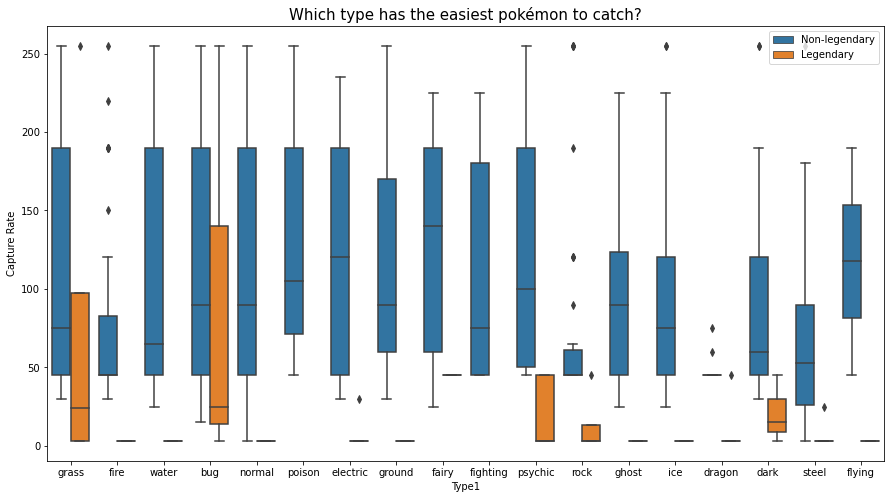

In [24]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x='type1',y='capture_rate', hue="is_legendary", data = df)
ax.set_title("Which type has the easiest pokémon to catch?", size=15)
ax.set(xlabel="Type1", ylabel="Capture Rate")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["Non-legendary", "Legendary"], loc='upper right')
plt.show()

Fairy type has the easiest pokémon to catch, while dragon has the hardest. <br>
The easiest legendary pokémon to catch are of type grass and bug. 
<br>

<br>

**Which is the best generation?** <br>
A box plot is a good choice for this as we will make assumptions based on the distribution of the base total stat.

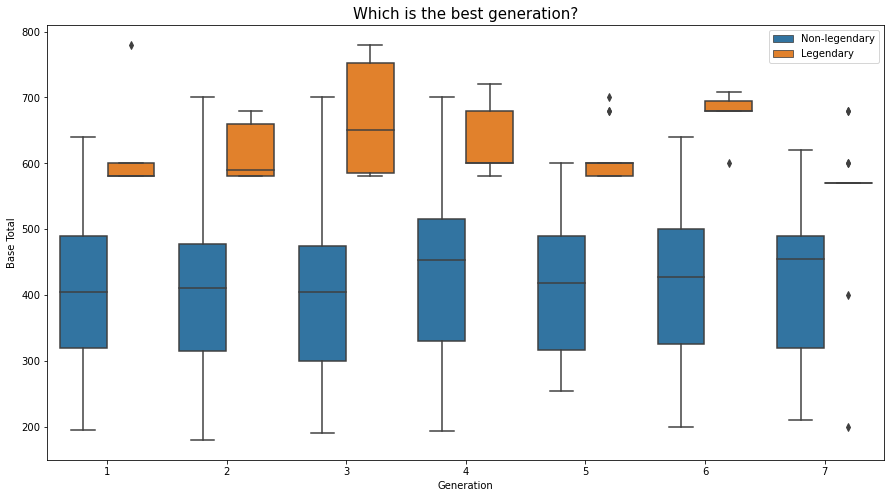

In [25]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x='generation',y='base_total', hue='is_legendary',data = df)
ax.set_title("Which is the best generation?", size=15)
ax.set(xlabel="Generation", ylabel="Base Total")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["Non-legendary", "Legendary"])
plt.show()

<br>

Now, let us find some insight of my favorite questions. <br>

**Which is the best type?** <br>
Let's use heatmaps to compare different types of Pokemon.

In [26]:
non_legendary_pokemon_attributes = df[df["is_legendary"]==0].groupby(['type1']).median()[["attack", "sp_attack", "defense", "sp_defense", "hp", "speed", "base_total"]]

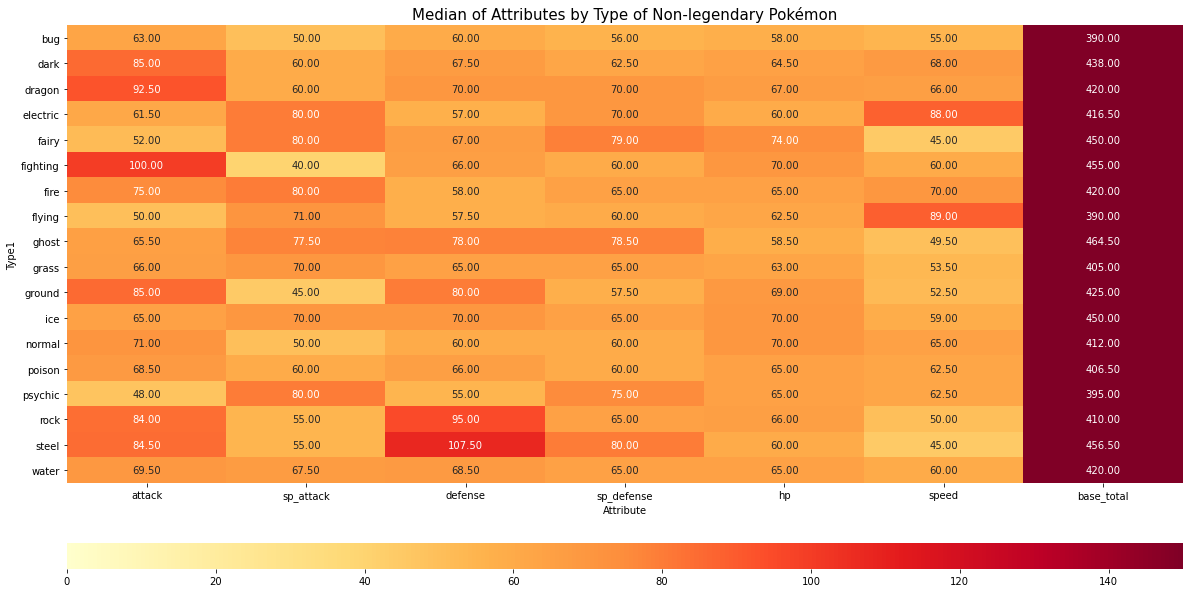

In [27]:
grid_kws = {"height_ratios": (.9, .05), "hspace": .25}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(20,10))
sns.heatmap(non_legendary_pokemon_attributes,
            annot= True,
            fmt = ".2f",
            vmin = 0,
            vmax = 150,
            ax=ax,
            cbar_ax=cbar_ax,
            cbar_kws={"orientation": "horizontal"},
            cmap="YlOrRd")
ax.set_title('Median of Attributes by Type of Non-legendary Pokémon', size = 15)
ax.set(ylabel="Type1", xlabel="Attribute")
plt.show()

* Regarding non-legendary pokémon:
    - Top 5 types - attack:    fighting, dragon, ground, dark, steel
    - Top 5 types - sp_attack: psychic, electric, fairy, fire, ghost
    - Top 5 types - defense:   steel, rock, ground, ghost, ice
    - Top 5 types - sp_defense:steel, fairy, ghost, psychic, dragon
    - Top 5 types - hp: fairy, normal, fighting, ice, ground
    - Top 5 types - speed: flying, electric, fire, dark, dragon
    - Top 5 types - base_total: ghost, steel, fighting, fairy and ice

Good types to attack are electric, fire, dark and dragon, since they are in the top 5 for attack or sp_attack and speed.

Good types to defend are fairy, ice and ground, since they are in the top 5 for defense or sp_defense and hp.

In [28]:
legendary_pokemon_attributes = df[df["is_legendary"]==1].groupby(['type1']).median()[["attack", "sp_attack", "defense", "sp_defense", "hp", "speed", "base_total"]]

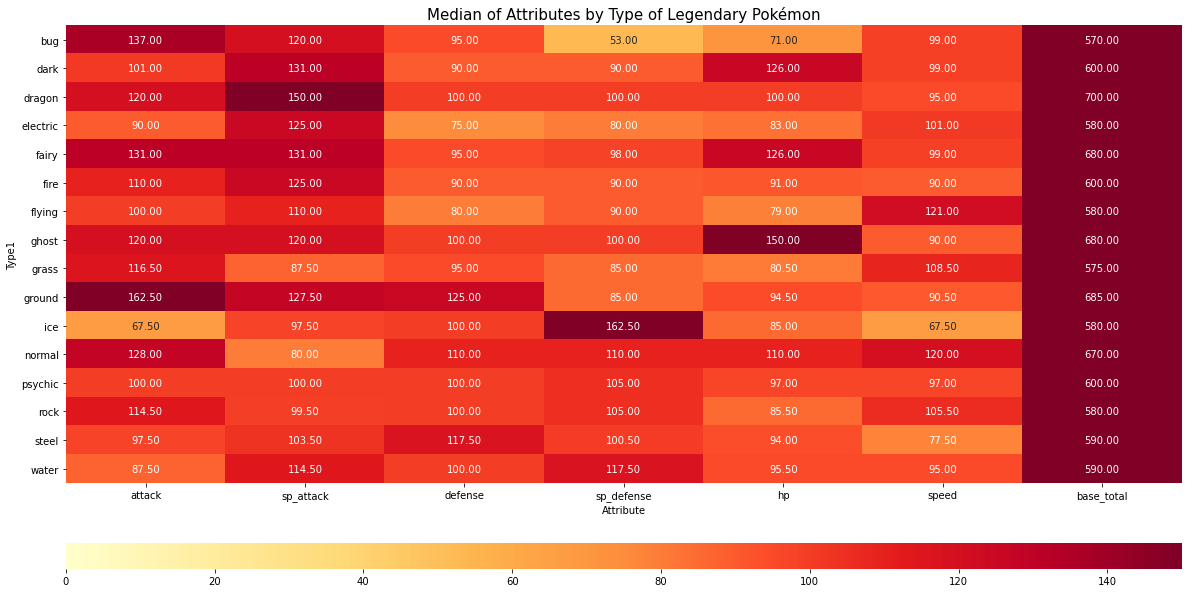

In [29]:
grid_kws = {"height_ratios": (.9, .05), "hspace": .25}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(20,10))
sns.heatmap(legendary_pokemon_attributes,
            annot= True,
            fmt = ".2f",
            vmin = 0,
            vmax = 150,
            ax=ax,
            cbar_ax=cbar_ax,
            cbar_kws={"orientation": "horizontal"},
            cmap="YlOrRd")
ax.set_title('Median of Attributes by Type of Legendary Pokémon', size = 15)
ax.set(ylabel="Type1", xlabel="Attribute")
plt.show()

* Regarding legendary pokémon:
    - Top 5 types - attack: ground, bug, fairy, normal, dragon
    - Top 5 types - sp_attack: dragon, dark, fairy, ground, electric
    - Top 5 types - defense: ground, steel, normal, dragon, ghost
    - Top 5 types - sp_defense: ice, water, normal, psychic, rock
    - Top 5 types - hp: ghost, dark, fairy, normal, dragon
    - Top 5 types - speed: flying, normal, grass, rock, electric
    - Top 5 types - base_total: dragon, ground, fairy, ghost, normal

Good types to attack are normal and electric, since they are in the top 5 for attack or sp_attack and speed.

Good types to defend are ghost, normal and dragon, since they are in the top 5 for defense or sp_defense and hp.


<br>

We have done all sort of analysis on all attributes, but we missed against_? types. <br>
Let's create a heatmap to analyze effectiveness on types.
<br>

In [30]:
against_columns = [ "against_bug", "against_dark", "against_dragon", "against_electric", "against_fairy", "against_fight", "against_fire",
                    "against_flying", "against_ghost", "against_grass", "against_ground", "against_ice", "against_normal", "against_poison", 
                    "against_psychic", "against_rock", "against_steel", "against_water"
                  ]

pokemon_type_effectiveness = df.groupby(['type1']).median()[against_columns]

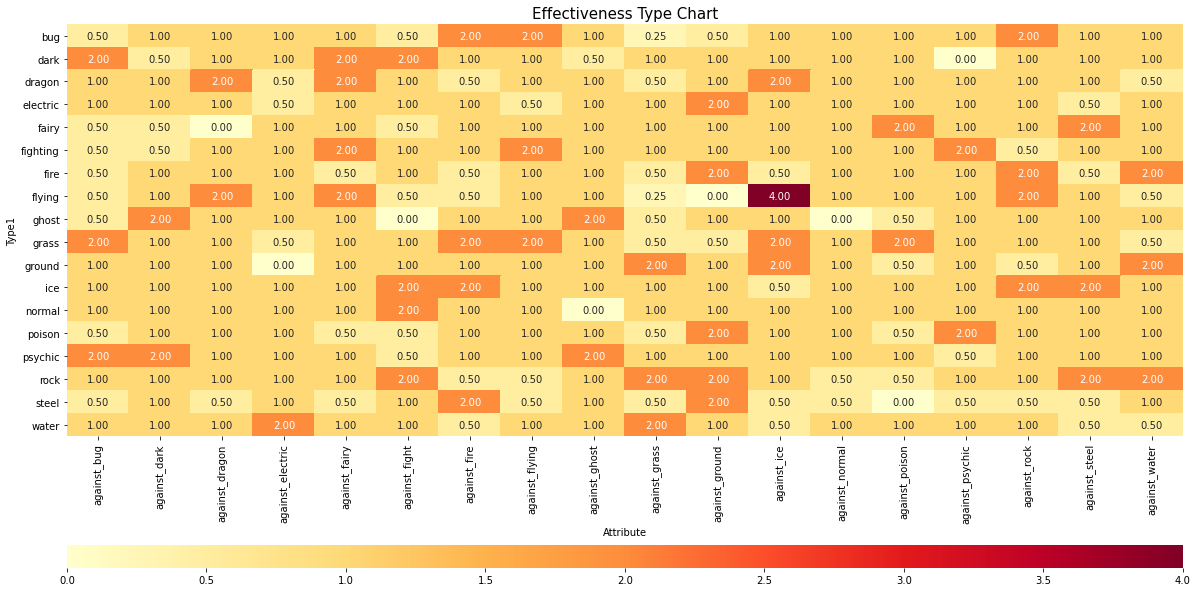

In [31]:
grid_kws = {"height_ratios": (.9, .05), "hspace": .5}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(20,10))
sns.heatmap(pokemon_type_effectiveness,
            annot= True,
            fmt = ".2f",
            vmin = 0,
            vmax = 4,
            ax=ax,
            cbar_ax=cbar_ax,
            cbar_kws={"orientation": "horizontal"},
            cmap="YlOrRd")
ax.set_title('Effectiveness Type Chart', size = 15)
ax.set(ylabel="Type1", xlabel="Attribute");

These results are quite useful when it comes to playing the game, 
- Electric is only weak against Ground 
- Ground and Normal is only weak against Fighting
- Ghost is weak against Ghost and,
- Flying is extremely weak against Ice.

There are some types that are pretty useless against (against = 0)
- psychic against dark
- dragon against fairy 
- ground against flying
- fighting against ghost
- normal against ghost
- ghost against normal
- electric against ground
- poison against steel
    
[This](https://pokemondb.net/type) website validates our results.

<br>

Now, lets analyze my favorite query of 'em all.<br>
**Which is the best Pokemon?** <br>
Let's use a bar plot as per the basic total stat.

In [32]:
top10_pokemon_base_total = df.sort_values(by="base_total", ascending=False).reset_index()[:10]

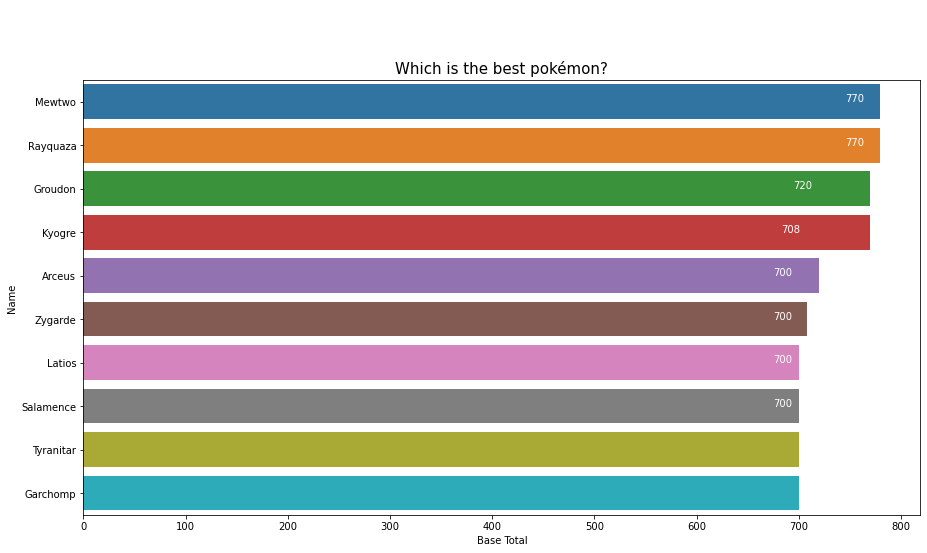

In [33]:
plt.figure(figsize=(15,8))
ax = sns.barplot(y=top10_pokemon_base_total["name"], x=top10_pokemon_base_total["base_total"], orient='h')
ax.set_title("Which is the best pokémon?", size=15)
ax.set(xlabel="Base Total", ylabel="Name")

# Annotate value labels to each pokémon
for index, row in top10_pokemon_base_total.iterrows(): 
    plt.annotate(row["base_total"], xy=(row["base_total"]-25, index-2), color='white') 

We have a tie between **Mewtwo and Rayquaza**. <br>
Let's compare them both using a Radar Chart.

In [34]:
attributes = ["attack", "sp_attack", "defense", "sp_defense", "hp", "speed"]

mewtwo = top10_pokemon_base_total[top10_pokemon_base_total["name"] == "Mewtwo"][attributes].values.tolist()[0]
rayquaza = top10_pokemon_base_total[top10_pokemon_base_total["name"] == "Rayquaza"][attributes].values.tolist()[0]

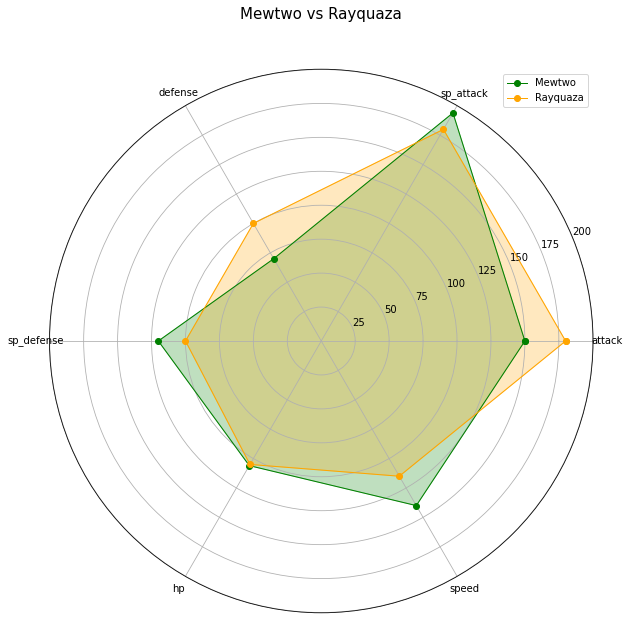

In [35]:
angles=np.linspace(0,2*np.pi,len(attributes), endpoint=False)
angles=np.concatenate((angles,[angles[0]]))
attributes.append(attributes[0])
mewtwo.append(mewtwo[0])
rayquaza.append(rayquaza[0])

fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(111, polar=True)

# Mewtwo Plot
ax.plot(angles, mewtwo, 'o-', color='g', linewidth=1, label='Mewtwo')
ax.fill(angles, mewtwo, alpha=0.25, color='g')
# Rayquaza Plot
ax.plot(angles,rayquaza, 'o-', color='orange', linewidth=1, label='Rayquaza')
ax.fill(angles, rayquaza, alpha=0.25, color='orange')

ax.set_thetagrids(angles[:-1] * 180/np.pi, attributes[:-1], fontsize=10)
plt.grid(True)
plt.legend(loc="upper right", fontsize=10)
ax.set_title("Mewtwo vs Rayquaza", fontsize=15, pad=50);

Rayquaza has better attack and defense, while Mewtwo is better considering the remaining attributes. <br>
However, my favorite pokemon will always remain **Snorlax and Psyduck**. 

<center>
    <img src = "images/snorlax.png" width="350"> 
    <img src = "images/psyduck.png" width = "350">
</center>

<br>

### **Predictive Analysis**
### Can we predict whether or not a Pokemon is a legendary?
Before we proceed to write code, lets take a look on the definition of a Legendary Pokemon from the [The Bulbapedia Wiki](https://bulbapedia.bulbagarden.net/wiki/Legendary_Pok%C3%A9mon), legendary Pokemon 
>  _...are a group of incredibly rare and often very powerful Pokémon, generally featured prominently in the legends and myths of the Pokémon world...No explicit criteria defines what makes a Pokémon a Legendary Pokémon. Instead, the only way to identify a Pokémon as belonging to this group is through statements from official media, such as the games or anime._

Let's preprocess our data first, for training.

In [36]:
pokemon_features = ['percentage_male','type1', 'type2', 'height_m', 'weight_kg', 
                     'experience_growth', 'hp', 'attack','base_total',
                     'defense','sp_attack', 'sp_defense', 'speed', 'capture_rate']

# Setting feature and target variables for training
X = pd.DataFrame(df[pokemon_features])
y = df['is_legendary']

Currently, there are three columns with null values. Let's deal with them.

In [37]:
X.isnull().sum()

percentage_male       98
type1                  0
type2                384
height_m              20
weight_kg             20
experience_growth      0
hp                     0
attack                 0
base_total             0
defense                0
sp_attack              0
sp_defense             0
speed                  0
capture_rate           1
dtype: int64

<br>
Only type1 attribute fulfill our needs, hence we set type2 values to be None. <br>
We also do not require the percentage_male attribute as this does not play a role in determining whether the Pokemon is legendary or not.

In [38]:
X['type2'].fillna("None", inplace=True)
X['percentage_male'].fillna(0, inplace=True)

<br>
For the missing values of height_m and weight_kg we will use SimpleImputer function.

<br>

#### Random Forest Model
We will use a RFModel with a simple pipeline implementation.

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Selecting categorical columns
categorical_cols = [cname for cname in X_train.columns if X_train[cname].dtype == 'object']

# Selecting numerical columns
numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64']]

# Imputing the numerical data 
numerical_transform = SimpleImputer(strategy='mean')

# Preprocessing the categorical transform 
categorical_transform = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                                        ('onehot', OneHotEncoder(handle_unknown='ignore'))
                                        ])

# Bundling the preprocessing transformers 
preprocessor = ColumnTransformer(transformers = [ ('num', numerical_transform, numerical_cols),
                                                  ('cat', categorical_transform, categorical_cols)])

# Defining the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)

# Creating the final pipeline 
pipeline = Pipeline(steps=[('preprocessorrf', preprocessor), ('modelrf', rf_model)])

In [40]:
# Fitting the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessorrf',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['percentage_male',
                                                   'height_m', 'weight_kg',
                                                   'experience_growth', 'hp',
                                                   'attack', 'base_total',
                                                   'defense', 'sp_attack',
                                                   'sp_defense', 'speed',
                                                   'capture_rate']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                     

In [41]:
# Predicting from the model on the test set
pred = pipeline.predict(X_test)

# Indexing the predictions
pred_index = X.index[pred]

# Confusion matrix of the predicted legendary pokemon
pd.crosstab(y_test, pred_index, rownames=['Actual Legendary'], colnames=['Predicted Legendary'])

Predicted Legendary,0,1
Actual Legendary,,
0,145,1
1,6,9


In [42]:
accuracy_rf = accuracy_score(pred, y_test)
print(f'The accuracy of Random Forest Classifier is: {accuracy_rf}')

The accuracy of Random Forest Classifier is: 0.9565217391304348


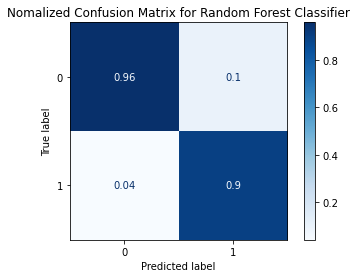

In [43]:
conf_mat_rf = confusion_matrix(pred, y_test)
plot = plot_confusion_matrix(pipeline, X_test, y_test, cmap = plt.cm.Blues, normalize = 'pred')
plot.ax_.set_title("Nomalized Confusion Matrix for Random Forest Classifier")
plt.show()

The accuracy in which the legendaries were predicted is 9/15 which is 60%. <br>
While LabelEncoding can increase this percentage, however we will not apply LabelEncoding to this model.

<br>

### Gradient Boosting Model
A gradient booster model will have a high accuracy on this kind of dataset. We will use XGBClassifier from xgboost library.

In [44]:
# Making a copy to avoid spoiling the original transformed feature variables
label_X_train = X_train.copy()
label_X_test = X_test.copy()

# Applying LabelEncoder to each column with categorical data
le = LabelEncoder()
for col in categorical_cols:
    label_X_train[col] = le.fit_transform(X_train[col])
    label_X_test[col] = le.transform(X_test[col])        # We never fit_transform on the feature variables of the test set.

# Imputation
imputed_X_train = pd.DataFrame(numerical_transform.fit_transform(label_X_train))
imputed_X_test = pd.DataFrame(numerical_transform.transform(label_X_test))

# Imputation removes column names, hence putting them back
imputed_X_train.columns = label_X_train.columns
imputed_X_test.columns = label_X_test.columns

In [45]:
# Creating the XGB Model
XGB_model = XGBClassifier (n_estimators = 100, learning_rate=0.1, eval_metric='logloss')

# Training the model
XGB_model.fit(imputed_X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(imputed_X_test, y_test)], 
             verbose=False)

# Predicting on the test set
pred = XGB_model.predict(imputed_X_test)
pred_index = X.index[pred]

# Confusion matrix of the predicted legendary pr
pd.crosstab(y_test, pred_index, rownames=['Actual Legendary'], colnames=['Predicted Legendary'])

/home/swarajpande/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Predicted Legendary,0,1
Actual Legendary,,
0,145,1
1,3,12


In [46]:
accuracy_xgb = accuracy_score(pred, y_test)
print(f'The accuracy of XGBClassifier is: {accuracy_xgb}')

The accuracy of XGBClassifier is: 0.9751552795031055


The accuracy in which the legendaries were predicted is 12/15 which is 80%. <br>